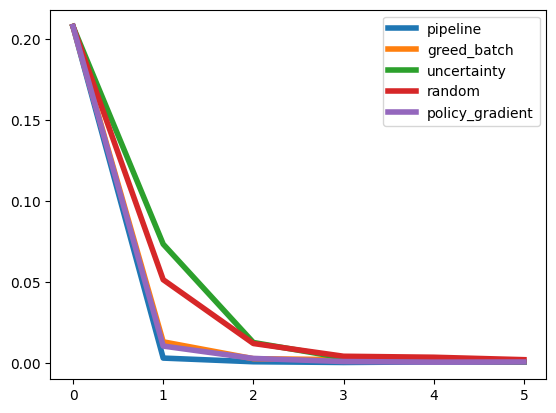

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
directory = './result_0518/'
df_active = pd.read_csv(directory + 'active_learning_0.csv')
df_active = df_active.transpose()
df_active['sweep_id'] = df_active.index

sweep_dict = {'valiant-sweep-3 - var_square_loss_track': 'greed_batch',
            'volcanic-sweep-2 - var_square_loss_track': 'uncertainty',
            'decent-sweep-1 - var_square_loss_track':'random'
             }
all_key_val = list(sweep_dict.keys())
df_active = df_active[df_active['sweep_id'].isin(all_key_val)]
df_active['sweep_id'].replace(sweep_dict, inplace=True)


df_pipeline = pd.read_csv(directory + 'pipeline.csv')
df_pipeline = df_pipeline.transpose()
df_pipeline['sweep_id'] = df_pipeline.index
sweep_dict = {'generous-sweep-1 - var_square_loss_track': 'pipeline', 
             }
all_key_val = list(sweep_dict.keys())
df_pipeline = df_pipeline[df_pipeline['sweep_id'].isin(all_key_val)]
df_pipeline['sweep_id'].replace(sweep_dict, inplace=True)

df_pg = pd.read_csv(directory + 'pg.csv')
df_pg = df_pg.transpose()
df_pg['sweep_id'] = df_pg.index
sweep_dict = {'lunar-sweep-6 - var_square_loss_track': 'policy_gradient', 
             }
all_key_val = list(sweep_dict.keys())
df_pg = df_pg[df_pg['sweep_id'].isin(all_key_val)]
df_pg['sweep_id'].replace(sweep_dict, inplace=True)

df_all = pd.concat([df_pipeline, df_active, df_pg], axis = 0)

keys_all = list(df_all['sweep_id'])
x_axis = [0,1,2,3,4,5]
for key in keys_all:
    val_temp = np.array(df_all[df_all['sweep_id'] == key][x_axis])[0]
    plt.plot(x_axis, val_temp, label = key, linewidth = 4)
    
plt.legend()
plt.show()
    